In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 23.8MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

NameError: ignored

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 100ms/step - loss: 0.6656 - accuracy: 0.6026 - val_loss: 0.6024 - val_accuracy: 0.6858
Epoch 2/10
625/625 [==============================] - 62s 99ms/step - loss: 0.5662 - accuracy: 0.7061 - val_loss: 0.5366 - val_accuracy: 0.7306
Epoch 3/10
625/625 [==============================] - 62s 99ms/step - loss: 0.4648 - accuracy: 0.7783 - val_loss: 0.4983 - val_accuracy: 0.7766
Epoch 4/10
625/625 [==============================] - 60s 96ms/step - loss: 0.3301 - accuracy: 0.8507 - val_loss: 0.5888 - val_accuracy: 0.7634
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1949 - accuracy: 0.9205 - val_loss: 0.8874 - val_accuracy: 0.7688
Epoch 6/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1128 - accuracy: 0.9571 - val_loss: 1.0540 - val_accuracy: 0.7440
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0786 - accuracy: 0.9721 - val_loss: 1.0945 - val_accuracy

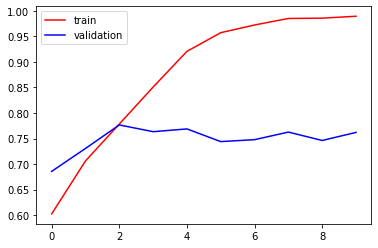

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

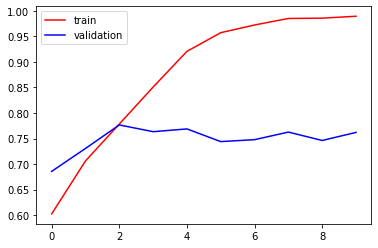

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 116ms/step - loss: 1.2492 - accuracy: 0.5612 - val_loss: 0.6683 - val_accuracy: 0.5838
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.6408 - accuracy: 0.6080 - val_loss: 0.5900 - val_accuracy: 0.6466
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5767 - accuracy: 0.6733 - val_loss: 0.6429 - val_accuracy: 0.7038
Epoch 4/10
625/625 [==============================] - 73s 117ms/step - loss: 0.5033 - accuracy: 0.7390 - val_loss: 0.4824 - val_accuracy: 0.7686
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4407 - accuracy: 0.7811 - val_loss: 0.5869 - val_accuracy: 0.6444
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3895 - accuracy: 0.8101 - val_loss: 0.4652 - val_accuracy: 0.7334
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3355 - accuracy: 0.8417 - val_loss: 0.4562 - val_ac

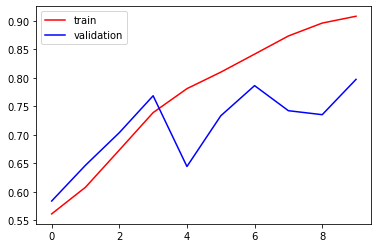

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

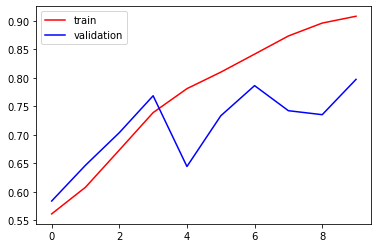

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

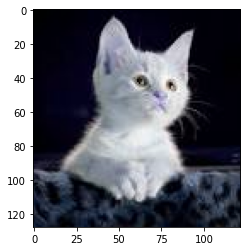

In [ ]:
import cv2
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [ ]:
test_img.shape

(128, 122, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 239ms/step


array([[0.]], dtype=float32)